In [ ]:
from nela_features.nela_features import NELAFeatureExtractor
import pandas as pd
import numpy as np 
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score
from sklearn import svm
from sklearn import metrics

nela = NELAFeatureExtractor()



In [ ]:
# import nltk
# nltk.download('averaged_perceptron_tagger')
#nltk.download('maxent_ne_chunker')
# nltk.download('words')

[nltk_data] Downloading package words to /home/yash/nltk_data...
[nltk_data]   Package words is already up-to-date!


True

In [ ]:
df = pd.read_csv('sample_title20k.csv')
df = df[['title','label']]
df = df[pd.notnull(df['title'])]

n = df.shape
print(n)
90-90 dataset
df.index = range(n[0])
X  = df['title']
Y = df['label']
X_X = []
Y_Y = []
# for x in X:
#     print(x)
for x in df.index:
#     print(df['body'][x],df['label'][x])
#     break
    try:
        X_X.append(nela.extract_all(df['title'][x])[0])
        Y_Y.append(df['label'][x])
    except:
        pass
# X = X.apply(lambda x: nela.extract_all(x)[0])
X_train, X_test , Y_train, Y_test = train_test_split(X_X, Y_Y , test_size = 0.20)

(19999, 2)


/usr/lib/python3/dist-packages/dateutil/parser/_parser.py:1199: UnknownTimezoneWarning: tzname EST identified but not understood.  Pass `tzinfos` argument in order to correctly return a timezone-aware datetime.  In a future version, this will raise an exception.
  warnings.warn("tzname {tzname} identified but not understood.  "
/usr/lib/python3/dist-packages/dateutil/zoneinfo/__init__.py:26: UserWarning: I/O error(2): No such file or directory
  warnings.warn("I/O error({0}): {1}".format(e.errno, e.strerror))


In [ ]:
import matplotlib.pyplot as plt
import itertools
def plot_confusion_matrix(cm, classes,normalize=False,title='Confusion matrix',cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        print(j,i,cm[i,j])
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

accuracy:   0.644
Confusion matrix, without normalization
0 0 1325
1 0 702
0 1 721
1 1 1252


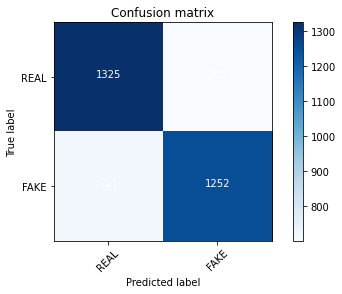

In [ ]:
#SVM
from sklearn import svm
clf = svm.SVC()
clf.fit(X_train, Y_train)
pred = clf.predict(X_test)
score = metrics.accuracy_score(Y_test, pred)
print("accuracy:   %0.3f" % score)
cm = metrics.confusion_matrix(Y_test, pred)
plot_confusion_matrix(cm, classes=['REAL', 'FAKE'])


/home/yash/.local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


accuracy:   0.704
Confusion matrix, without normalization
0 0 1429
1 0 598
0 1 587
1 1 1386


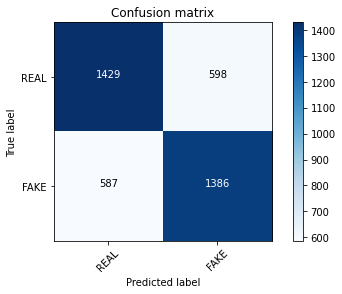

In [ ]:
#logistic regression
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, Y_train)
pred = classifier.predict(X_test)
score = metrics.accuracy_score(Y_test, pred)
print("accuracy:   %0.3f" % score)
cm = metrics.confusion_matrix(Y_test, pred)
plot_confusion_matrix(cm, classes=['REAL', 'FAKE'])